In [59]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same", name="conv_1")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same", name="conv_2")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same", name="conv_3")(x)
x = layers.Conv2D(filters=10, kernel_size=7, padding="valid", activation="softmax")(x)
outputs = layers.Flatten()(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [60]:
# from tensorflow import keras
# from tensorflow.keras import layers

# inputs = keras.Input(shape=(28, 28, 1))
# x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", name="conv_1")(inputs)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", name="conv_2")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", name="conv_3")(x)
# x = layers.Flatten()(x)
# outputs = layers.Dense(10, activation="softmax")(x)
# model = keras.Model(inputs=inputs, outputs=outputs)


In [61]:
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 10)          627

(60000, 28, 28)
(60000,)


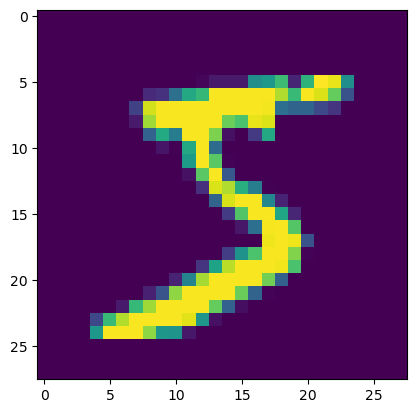

In [62]:
from tensorflow.keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
plt.imshow(train_images[0])

In [63]:

def transform_mnist(images):
    images = images.reshape((-1, 28, 28, 1))
    images = images.astype("float32") / 255
    return images

transform_mnist(train_images).shape

(60000, 28, 28, 1)

In [64]:

model.compile(
    optimizer="rmsprop",
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"]
)

In [65]:
transformed_train_images = transform_mnist(train_images)
transformed_test_images = transform_mnist(test_images)
model.fit(transformed_train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
938/938 [==============================] - 31s 21ms/step - loss: 0.3021 - accuracy: 0.9022
Epoch 2/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0401 - accuracy: 0.9875
Epoch 3/5
938/938 [==============================] - 10s 10ms/step - loss: 0.0283 - accuracy: 0.9918
Epoch 4/5
938/938 [==============================] - 10s 10ms/step - loss: 0.0206 - accuracy: 0.9936
Epoch 5/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0150 - accuracy: 0.9953


In [66]:
model_part1 = keras.Model(inputs=model.input, outputs=model.get_layer("conv_1").output)
conv1_out = model_part1.predict(transformed_train_images)

2022-09-23 15:19:54.165505: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 6021120000 exceeds 10% of free system memory.


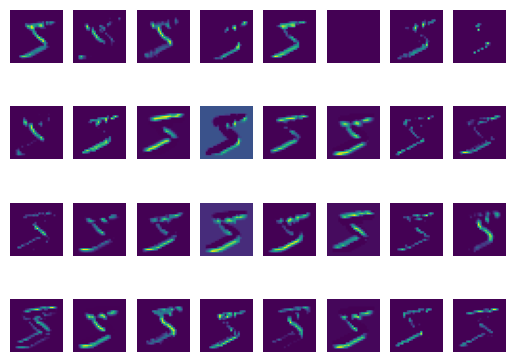

In [67]:
for channel in range(32):
    plt.subplot(4, 8, channel+1)
    plt.axis("off")
    plt.imshow(conv1_out[0, :, :, channel])


In [68]:
model_part2 = keras.Model(inputs=model.input, outputs=model.get_layer("conv_2").output)
conv2_out = model_part2.predict(transformed_train_images)

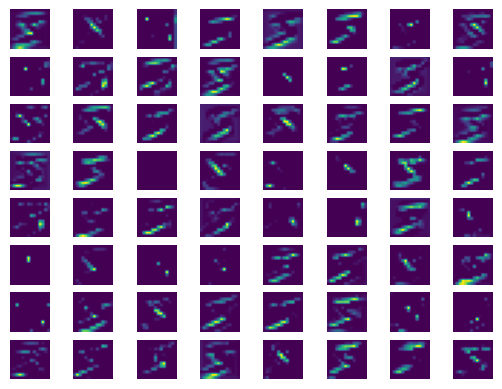

In [69]:
for channel in range(64):
    plt.subplot(8, 8, channel+1)
    plt.axis("off")
    plt.imshow(conv2_out[0, :, :, channel])

In [70]:
model_part3 = keras.Model(inputs=model.input, outputs=model.get_layer("conv_3").output)
conv3_out = model_part3.predict(transformed_train_images)


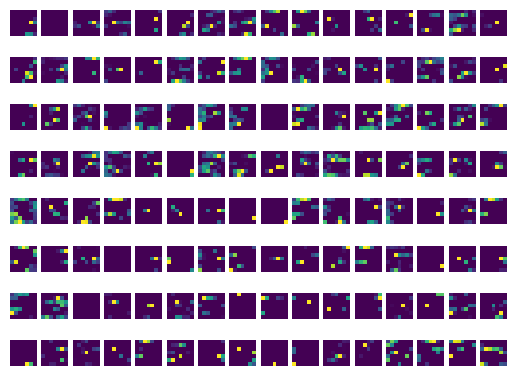

In [71]:
for channel in range(128):
    plt.subplot(8, 16, channel+1)
    plt.axis("off")
    plt.imshow(conv3_out[0, :, :, channel])